# Quran NLP

`معركة احد و غزوة حمراء الأسد هم عاملان اسيسان في تحفيز العمل على هذا المشروع المبارك`

## Importing and loading the dataset

In [1]:
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv('main.csv')

In [3]:
df = df.rename(columns={'Translation':'translation','Tafaseer - Tafsir al-Jalalayn': 'tafsir1', 'Tafaseer - Tanwir al-Miqbas min Tafsir Ibn Abbas':'tafsir2'})

In [4]:
df.head(1)

,Surah,Ayah,translation,quran_Tashkeel,quran_line,surah_no,surah_name_en,surah_name_ar,surah_name_roman,juz_no,hizb_quarter,total_ayah_surah,place_of_revelation,no_of_word_ayah,list_of_words,tafsir1,tafsir2,revelation_order,hizb
0,1,1,"In the name of Allah, the Entirely Merciful, t...",بِسْمِ اللَّهِ الرَّحْمَـٰنِ الرَّحِيمِ,بسم الله الرحمن الرحيم,1,The Opener,الفاتحة,Al-Fatihah,1,1,7,Meccan,4,"[بِسْمِ,ٱللَّهِ,ٱلرَّحْمَٰنِ,ٱلرَّحِيمِ]",In the Name of God the Compassionate the Merciful,"In the name of Allah, the Beneficent, the Merc...",5,1


In [5]:
df.columns

Index(['Surah', 'Ayah', 'translation', 'quran_Tashkeel', 'quran_line',
       'surah_no', 'surah_name_en', 'surah_name_ar', 'surah_name_roman',
       'juz_no', 'hizb_quarter', 'total_ayah_surah', 'place_of_revelation',
       'no_of_word_ayah', 'list_of_words', 'tafsir1', 'tafsir2',
       'revelation_order', 'hizb'],
      dtype='object')

# Using a new approach to deal with text

In [6]:

# 2 arrays - they will contain the whole text of the quran. 

arabic_text = []
all_english_text=[]

# take a row of the df
# this for-loop will be a row by row for loop ! 
for index, row in df.iterrows():
    arabic_text.append(row['quran_Tashkeel']) # row of the arabic quran
    t = ""
    t += row['surah_name_roman'] + "|" + str(row['Surah'])+"|"+str(row['Ayah'])+"|" # surah name | number of surah | number of ayah in that surah |
    t += row['translation'] + ";" # row of 1 translation
    
    t += "|" # 😊
    
    # both tafsir's 
    for j in range(1, 3):
        t+= row['tafsir' + str(j)] + ";"
    t = t[:-1] # take all the text but excluding the final character which is ';' -- slicing
    all_english_text.append(t) # the whole quran line by line with tafsir , very cool -> 6236 items

In [7]:
len(all_english_text)

6236

In [8]:
all_english_text[:7]

['Al-Fatihah|1|1|In the name of Allah, the Entirely Merciful, the Especially Merciful.;|In the Name of God the Compassionate the Merciful;In the name of Allah, the Beneficent, the Merciful.',
 "Al-Fatihah|1|2|[All] praise is [due] to Allah, Lord of the worlds -;|In the Name of God the name of a thing is that by which it can be known. The Names of God exalted be He are the archetypal forms ṣuwar nawʿiyya whose specificities and ipseities hūwiyya indicate the attributes of God and His essence and which indicate by their very existence His countenance and by their individuation His oneness. For these are the outward manifestations through which He can be known; Allāh is a name for the divine essence qua essence absolutely without taking into consideration that it may be qualified by the attributes or indeed taking into consideration that it may not be so qualified; the Compassionate is the one who causes existence and perfection to flow upon all things in the measure that divine wisdom re

In [9]:
len(arabic_text)

6236

In [10]:

arabic_text[:10] # it is like a series, but in an array for analysis purposes

['بِسْمِ اللَّهِ الرَّحْمَـٰنِ الرَّحِيمِ',
 'الْحَمْدُ لِلَّهِ رَبِّ الْعَالَمِينَ',
 'الرَّحْمَـٰنِ الرَّحِيمِ',
 'مَالِكِ يَوْمِ الدِّينِ',
 'إِيَّاكَ نَعْبُدُ وَإِيَّاكَ نَسْتَعِينُ',
 'اهْدِنَا الصِّرَاطَ الْمُسْتَقِيمَ',
 'صِرَاطَ الَّذِينَ أَنْعَمْتَ عَلَيْهِمْ غَيْرِ الْمَغْضُوبِ عَلَيْهِمْ وَلَا الضَّالِّينَ',
 'بِسْمِ اللَّهِ الرَّحْمَـٰنِ الرَّحِيمِ الم',
 'ذَٰلِكَ الْكِتَابُ لَا رَيْبَ ۛ فِيهِ ۛ هُدًى لِلْمُتَّقِينَ',
 'الَّذِينَ يُؤْمِنُونَ بِالْغَيْبِ وَيُقِيمُونَ الصَّلَاةَ وَمِمَّا رَزَقْنَاهُمْ يُنْفِقُونَ']

### Why are we using arrays instead of using a pandas df ? why all of this work ? 

- This approach makes it better for `tokenization`
- This is the approach used to `prepare the text` for the `nltk library` 

In [11]:
len(all_english_text)

6236

In [12]:
all_english_text[7].split("|")

['Al-Baqarah',
 '2',
 '1',
 'Alif, Lam, Meem.;',
 "Alif lām mīm God knows best what He means by these letters.;And on his authority>'Abdullah ibn al-Mubarak>'Ali Ibn Ishaq al-Samarqandi>Muhammad Ibn Marwan>al-Kalbi>Abu Salih that Ibn 'Abbas said, concerning Allah's saying, Exalted is He, (Alif. Lam. Mim): 'Alif stands for Allah, Lam for the Archangel Gabriel (Jibril) and Mim for Muhammad. It is also said Alif stands for Allah's blessings (ala'uh), Lam for His kindness (lutfuh) and Mim for His dominion (mulkuh). It is also said that Alif stands for the beginning of the Name Allah, Lam for the beginning of His Name the Kind (al-Latif) and Mim for the beginning of His Name the Glorious (al-Majid). It is also said that only Allah knows the meaning of these disjointed letters; while some maintain that it is an oath that He made."]

In [19]:

# a bunch of arrays that
# 'surah_arabic' - stores the surahs using arrays, so [[ 'surahs stored here' ]] -> 2 dimensional array stored here { Arabic version }
# 'ayat_arabic' - gets the verses of the surah and forwards them into 'surah_arabic'
surah_arabic = []
ayat_arabic = []

# 'surah_english' - stores the surahs using arrays, so [[ 'surahs stored here' ]] -> 2 dimensional array stored here { English version }
# 'translation_english' - gets the verses of the surah and forwards them into 'surah_english'
surah_english = []
translation_english = []

# same as the above but for the tafseer 😆
tafseer_english = []
tafseer_ayat_english = []

current_surah = 1 # the number of the current surah

# using the length of "len(all_english_text)" as the range -- '6236' items
for i in range(len(all_english_text)):

    # how does the 'all_english_text' looks like when it's splitted ? 
    #  [ Surah_Name , Surah_Number, Ayah_Number, english Translation, english Tafseer]

    # check if the current surah number is different from the current_surah, then we will enter this loop
    if int(all_english_text[i].split("|")[1]) != current_surah:

        # save the whole surah
        if len(ayat_arabic)>0:
            surah_arabic.append(ayat_arabic)
            tafseer_english.append(tafseer_ayat_english)
            surah_english.append(translation_english)
        # reset the arrays to collect the text for the new surah
        ayat_arabic = []
        tafseer_ayat_english = []
        translation_english = []
        
        # update the current surah
        current_surah+=1

    # always add the current ayah arabic
    ayat_arabic.append(arabic_text[i])

    # always add the current english tafseer (it's the last item after splitting)
    tafseer_ayat_english.append(all_english_text[i].split("|")[-1])
    
    # always add the current english translation (it's the 2nd to last item after splitting)
    translation_english.append(all_english_text[i].split("|")[-2])

# Don't forget to add the last surah, after you finish the for-loop "سورة الناس"

surah_arabic.append(ayat_arabic)

tafseer_english.append(tafseer_ayat_english)

surah_english.append(translation_english)


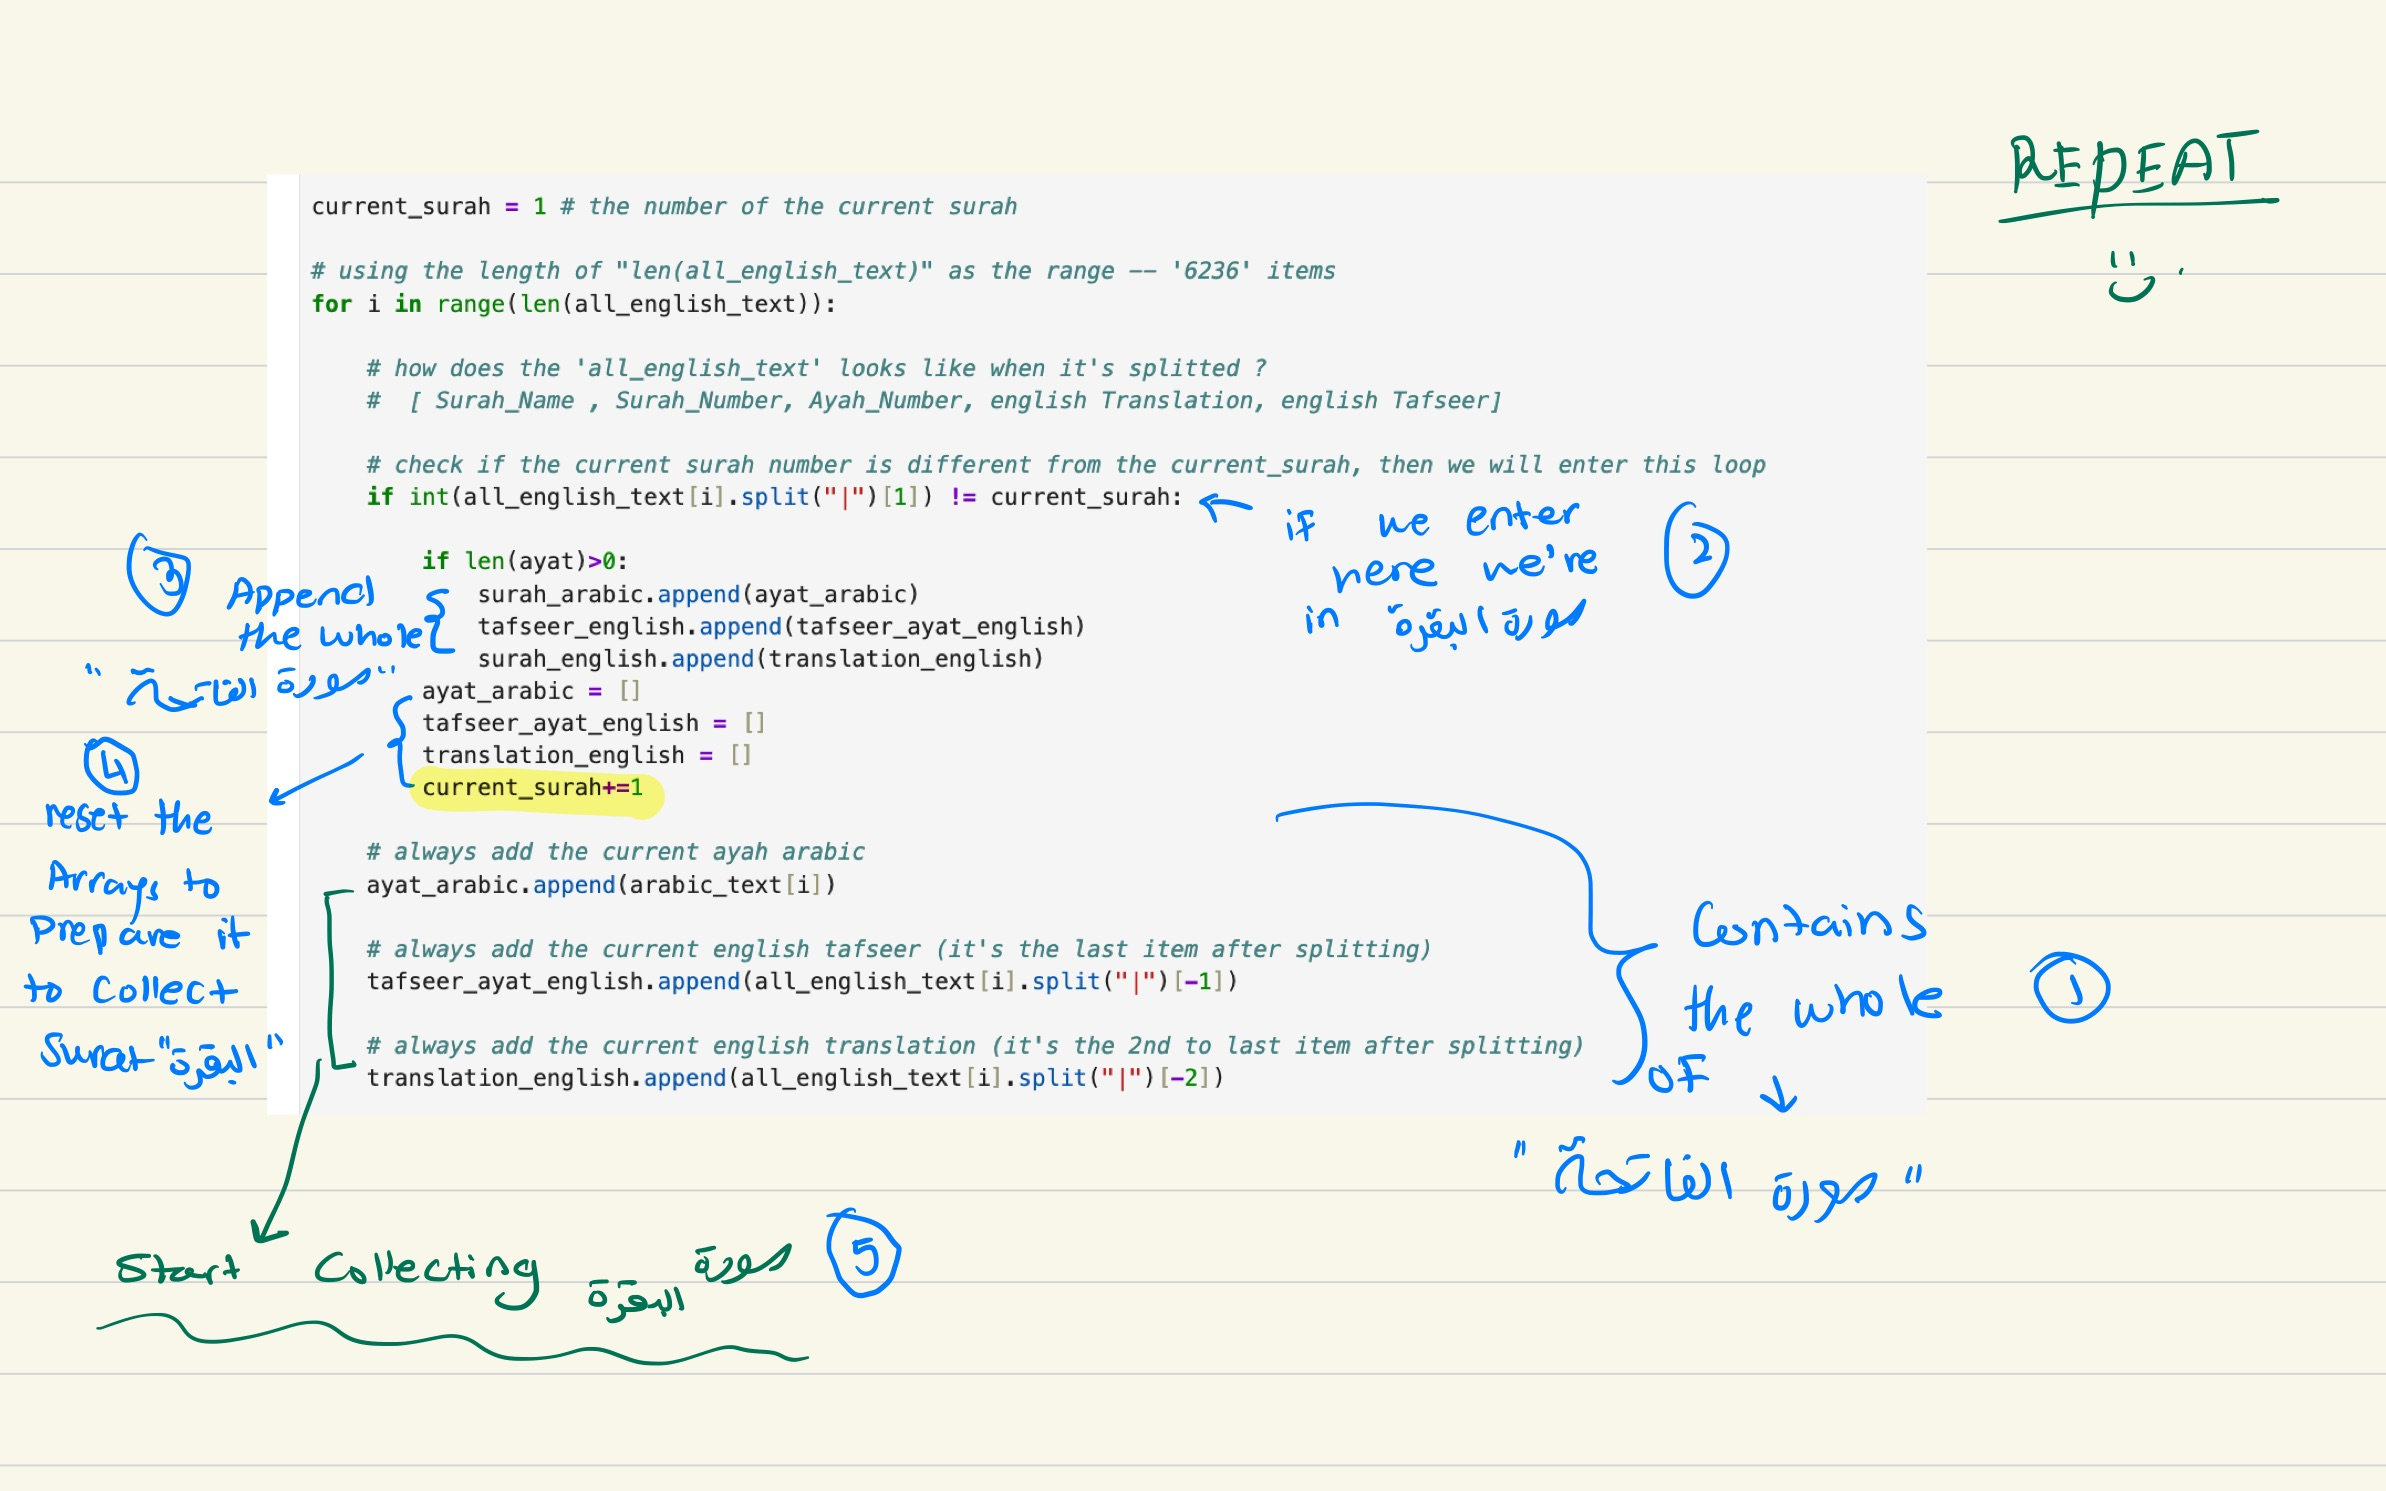

In [20]:
ayat_arabic #

['بِسْمِ اللَّهِ الرَّحْمَـٰنِ الرَّحِيمِ قُلْ أَعُوذُ بِرَبِّ النَّاسِ',
 'مَلِكِ النَّاسِ',
 'إِلَـٰهِ النَّاسِ',
 'مِنْ شَرِّ الْوَسْوَاسِ الْخَنَّاسِ',
 'الَّذِي يُوَسْوِسُ فِي صُدُورِ النَّاسِ',
 'مِنَ الْجِنَّةِ وَالنَّاسِ']

In [21]:
tafseer_ayat_english

["Say ‘I seek refuge in the Lord of mankind their Creator and their Possessor they mankind have been singled out for mention here in order to honour them and a preface to seeking refuge from the evil of the one who whispers in their hearts;;And from his narration on the authority of Ibn 'Abbas that he said regarding the interpretation of Allah's saying (Say: I seek refuge): '(Say: I seek refuge) and it is also said this means: I seek protection (in the Lord of mankind) in the Lord of the jinn and humankind,",
 'the King of mankind;(The King of mankind) the King of the jinn and humankind,',
 'the God of mankind both maliki’l-nās and ilāhi’l-nās are either substitutions or adjectival qualifications or explicative supplements; the repetition of the annexed word al-nās is meant as an additional explication;(The God of mankind) the Creator of the jinn and humankind,',
 'from the evil of the slinking whisperer Satan — he is referred to by the name of the action waswasa on account of his repe

In [22]:
# a 2-dimensional array that contains the whole quran in arabic

surah_arabic[:1]

[['بِسْمِ اللَّهِ الرَّحْمَـٰنِ الرَّحِيمِ',
  'الْحَمْدُ لِلَّهِ رَبِّ الْعَالَمِينَ',
  'الرَّحْمَـٰنِ الرَّحِيمِ',
  'مَالِكِ يَوْمِ الدِّينِ',
  'إِيَّاكَ نَعْبُدُ وَإِيَّاكَ نَسْتَعِينُ',
  'اهْدِنَا الصِّرَاطَ الْمُسْتَقِيمَ',
  'صِرَاطَ الَّذِينَ أَنْعَمْتَ عَلَيْهِمْ غَيْرِ الْمَغْضُوبِ عَلَيْهِمْ وَلَا الضَّالِّينَ']]

In [23]:
surah_english[0]

['In the name of Allah, the Entirely Merciful, the Especially Merciful.;',
 '[All] praise is [due] to Allah, Lord of the worlds -;',
 'The Entirely Merciful, the Especially Merciful,;',
 'Sovereign of the Day of Recompense.;',
 'It is You we worship and You we ask for help.;',
 'Guide us to the straight path -;',
 'The path of those upon whom You have bestowed favor, not of those who have evoked [Your] anger or of those who are astray.;']

In [24]:
tafseer_english[0]

['In the Name of God the Compassionate the Merciful;In the name of Allah, the Beneficent, the Merciful.',
 "In the Name of God the name of a thing is that by which it can be known. The Names of God exalted be He are the archetypal forms ṣuwar nawʿiyya whose specificities and ipseities hūwiyya indicate the attributes of God and His essence and which indicate by their very existence His countenance and by their individuation His oneness. For these are the outward manifestations through which He can be known; Allāh is a name for the divine essence qua essence absolutely without taking into consideration that it may be qualified by the attributes or indeed taking into consideration that it may not be so qualified; the Compassionate is the one who causes existence and perfection to flow upon all things in the measure that divine wisdom requires and to the capacity of the receiving entities qawābil from the outset of their creation; the Merciful al-Raḥīm is the one who bestows the spiritual 

most important variables here are: `surah`, `surah_english`, `tafseer`

## checking the lengths of the newely created arrays

In [25]:
len(tafseer_english)

114

In [26]:
len(surah_arabic)

114

In [27]:
len(surah_english)

114

The arrays represent the holy quran correctly, they are `All good`

In [28]:
surah_arabic[0]

['بِسْمِ اللَّهِ الرَّحْمَـٰنِ الرَّحِيمِ',
 'الْحَمْدُ لِلَّهِ رَبِّ الْعَالَمِينَ',
 'الرَّحْمَـٰنِ الرَّحِيمِ',
 'مَالِكِ يَوْمِ الدِّينِ',
 'إِيَّاكَ نَعْبُدُ وَإِيَّاكَ نَسْتَعِينُ',
 'اهْدِنَا الصِّرَاطَ الْمُسْتَقِيمَ',
 'صِرَاطَ الَّذِينَ أَنْعَمْتَ عَلَيْهِمْ غَيْرِ الْمَغْضُوبِ عَلَيْهِمْ وَلَا الضَّالِّينَ']

# The `HOLY Quran` in `1 string`

In [42]:
quran = '\n'.join(verse for surah in surah_arabic for verse in surah)

In [43]:
len(quran)

702441

In [44]:
quran[:500]

'بِسْمِ اللَّهِ الرَّحْمَـٰنِ الرَّحِيمِ\nالْحَمْدُ لِلَّهِ رَبِّ الْعَالَمِينَ\nالرَّحْمَـٰنِ الرَّحِيمِ\nمَالِكِ يَوْمِ الدِّينِ\nإِيَّاكَ نَعْبُدُ وَإِيَّاكَ نَسْتَعِينُ\nاهْدِنَا الصِّرَاطَ الْمُسْتَقِيمَ\nصِرَاطَ الَّذِينَ أَنْعَمْتَ عَلَيْهِمْ غَيْرِ الْمَغْضُوبِ عَلَيْهِمْ وَلَا الضَّالِّينَ\nبِسْمِ اللَّهِ الرَّحْمَـٰنِ الرَّحِيمِ الم\nذَٰلِكَ الْكِتَابُ لَا رَيْبَ ۛ فِيهِ ۛ هُدًى لِلْمُتَّقِينَ\nالَّذِينَ يُؤْمِنُونَ بِالْغَيْبِ وَيُقِيمُونَ الصَّلَاةَ وَمِمَّا رَزَقْنَاهُمْ يُنْفِقُونَ\nوَالَّذِي'

# The `Holy Quran Translated` in `1 string`

In [45]:
surah_english[0]

['In the name of Allah, the Entirely Merciful, the Especially Merciful.;',
 '[All] praise is [due] to Allah, Lord of the worlds -;',
 'The Entirely Merciful, the Especially Merciful,;',
 'Sovereign of the Day of Recompense.;',
 'It is You we worship and You we ask for help.;',
 'Guide us to the straight path -;',
 'The path of those upon whom You have bestowed favor, not of those who have evoked [Your] anger or of those who are astray.;']

In [46]:
quran_english = "\n".join(verse for surah in surah_english for verse in surah)

In [47]:
len(quran_english)

867818

In [48]:
quran_english[:1001]

'In the name of Allah, the Entirely Merciful, the Especially Merciful.;\n[All] praise is [due] to Allah, Lord of the worlds -;\nThe Entirely Merciful, the Especially Merciful,;\nSovereign of the Day of Recompense.;\nIt is You we worship and You we ask for help.;\nGuide us to the straight path -;\nThe path of those upon whom You have bestowed favor, not of those who have evoked [Your] anger or of those who are astray.;\nAlif, Lam, Meem.;\nThis is the Book about which there is no doubt, a guidance for those conscious of Allah -;\nWho believe in the unseen, establish prayer, and spend out of what We have provided for them,;\nAnd who believe in what has been revealed to you, [O Muhammad], and what was revealed before you, and of the Hereafter they are certain [in faith].;\nThose are upon [right] guidance from their Lord, and it is those who are the successful.;\nIndeed, those who disbelieve - it is all the same for them whether you warn them or do not warn them - they will not believe.;\nA

# The `Tafseer` in `1 string`

In [49]:
len(tafseer_english[0])

7

In [50]:
tafseer_all = "\n".join( verse_tafseer for surah_tafseer in tafseer_english for verse_tafseer in surah_tafseer )

In [51]:
len(tafseer_all)

4332321

In [52]:
len(quran.split("\n"))

6236

In [53]:
len(tafseer_all.split("\n"))

6236

# plotting the length of all Surahs

In [55]:
surah_arabic[0], surah_english[0]

(['بِسْمِ اللَّهِ الرَّحْمَـٰنِ الرَّحِيمِ',
  'الْحَمْدُ لِلَّهِ رَبِّ الْعَالَمِينَ',
  'الرَّحْمَـٰنِ الرَّحِيمِ',
  'مَالِكِ يَوْمِ الدِّينِ',
  'إِيَّاكَ نَعْبُدُ وَإِيَّاكَ نَسْتَعِينُ',
  'اهْدِنَا الصِّرَاطَ الْمُسْتَقِيمَ',
  'صِرَاطَ الَّذِينَ أَنْعَمْتَ عَلَيْهِمْ غَيْرِ الْمَغْضُوبِ عَلَيْهِمْ وَلَا الضَّالِّينَ'],
 ['In the name of Allah, the Entirely Merciful, the Especially Merciful.;',
  '[All] praise is [due] to Allah, Lord of the worlds -;',
  'The Entirely Merciful, the Especially Merciful,;',
  'Sovereign of the Day of Recompense.;',
  'It is You we worship and You we ask for help.;',
  'Guide us to the straight path -;',
  'The path of those upon whom You have bestowed favor, not of those who have evoked [Your] anger or of those who are astray.;'])

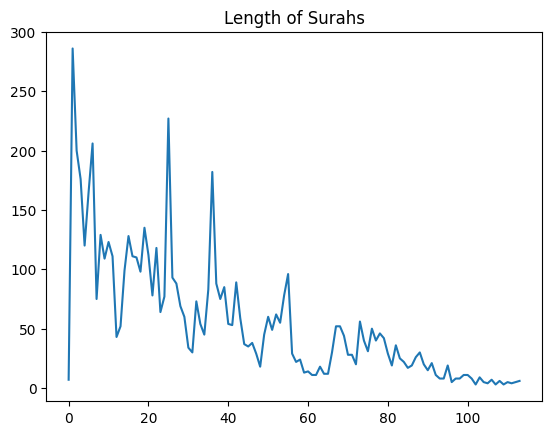

In [59]:

# list comprehension - 😊
len_of_surahs = [ len(surah) for surah in surah_english ]


plt.title("Length of Surahs")
plt.plot(len_of_surahs)


what does this means ? 

- can the shape of this graph correlate with something in real life ?
- `x-aixs` ->  number of surah, `y-axis` -> number of verses in that surah 

### this is possible with pandas i believe ...

# Length of Ayats

Text(0, 0.5, 'Length of the verse in charaters')

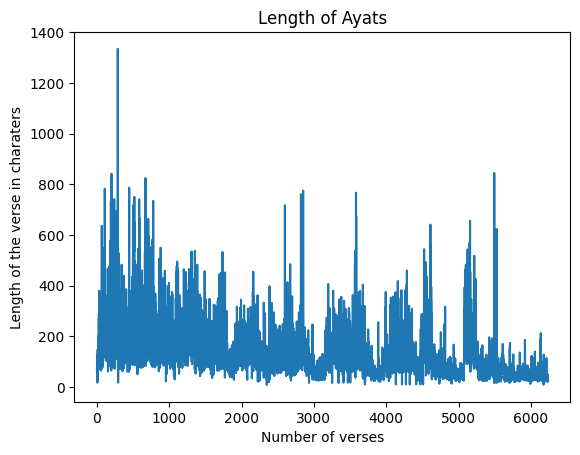

In [64]:

len_of_ayats = [  len(verse) for surah in surah_english for verse in surah ]

plt.title("Length of Ayats")
plt.plot(len_of_ayats)
plt.xlabel('Number of verses')
plt.ylabel('Length of the verse in charaters')


In [65]:
len(len_of_ayats) # we have 6236 ayat's

6236

In [66]:
max(len_of_ayats), min(len_of_ayats) # the maximum and minimum ayats

(1335, 8)

In [68]:
len(tafseer_all), len(tafseer_english)

(4332321, 114)

Text(0, 0.5, 'Length of the Tafseer of the verse in charaters')

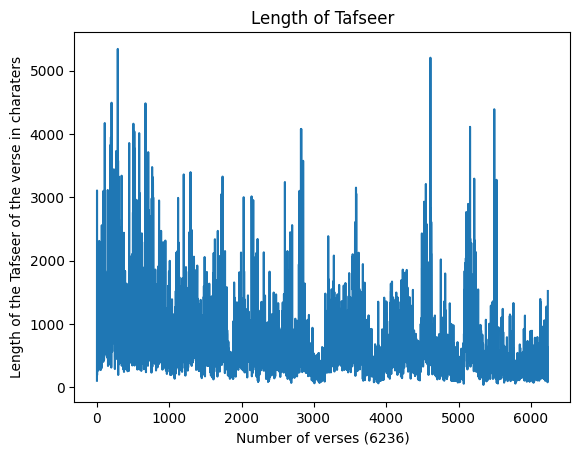

In [73]:
len_of_tafseers = [ len(verse_tafseer) for surah_tafseer in tafseer_english for verse_tafseer in surah_tafseer ]


# len_of_tafseers = []
# for i in tafseer_english:
#     for j in i:
#         len_of_tafseers.append(len(j))
    
plt.title("Length of Tafseer")
plt.plot(len_of_tafseers)
plt.xlabel('Number of verses (6236)')
plt.ylabel('Length of the Tafseer of the verse in charaters')

In [74]:
len(tafseer_english[0][1]) # 

3107

In [75]:
len(tafseer_english) # 114 surahs

114

In [76]:
len(tafseer_english[0]) # surat al-fatiha

7

In [80]:
len(tafseer_english[0][1]) # the { Tafseer } of the 2nd verse of surat " Al - Fatiha "  

3107

what is the maximum charater length of > 5000 chars for the tafseer of a verse of the quran: 
- what is that verse ? 
- what is the maxmimum tafseer length of an ayah ? and what is the verse ? 
- what is the minimum and what is the verse ? 

## NLP 

In [81]:
import nltk

In [83]:
nltk.download('punkt')  # pre-trained tokenizer - puncatuation tokenizer "punkt"
nltk.download('stopwords') # flitering common words - "stopwords"
nltk.download('wordnet') # a vocabulary for the nltk library

# OMW = Open Multilingual WordNet.
# It’s required for accessing translations or lemmatization in various languages, - what is a lemmatizer { the answer is down below }
# and to enhance WordNet lemmatizer capabilities.

# automatically used when you use lemmatization! very cool
nltk.download('omw-1.4') # multilingual WordNet support , 

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/alialshaikh/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/alialshaikh/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/alialshaikh/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/alialshaikh/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [84]:
import nltk
import re # regular expressions (python built-in library) 
import string
from nltk.corpus import stopwords # ☕️
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer # lemmatizer ? what is it ? 


# we will be using the `quran_english` & `tafseer_all`

In [87]:
lower_case_quran = quran_english.lower()
lower_case_tafseer = tafseer_all.lower()

In [88]:
lower_case_quran[:1000]

'in the name of allah, the entirely merciful, the especially merciful.;\n[all] praise is [due] to allah, lord of the worlds -;\nthe entirely merciful, the especially merciful,;\nsovereign of the day of recompense.;\nit is you we worship and you we ask for help.;\nguide us to the straight path -;\nthe path of those upon whom you have bestowed favor, not of those who have evoked [your] anger or of those who are astray.;\nalif, lam, meem.;\nthis is the book about which there is no doubt, a guidance for those conscious of allah -;\nwho believe in the unseen, establish prayer, and spend out of what we have provided for them,;\nand who believe in what has been revealed to you, [o muhammad], and what was revealed before you, and of the hereafter they are certain [in faith].;\nthose are upon [right] guidance from their lord, and it is those who are the successful.;\nindeed, those who disbelieve - it is all the same for them whether you warn them or do not warn them - they will not believe.;\na

In [118]:

# this function is better ☕️

def clean_text(text):
    
    # Make sure that the text is in the lower case form
    text = text.lower()
    
    # Remove the special characters
    text = re.sub(r'\W', ' ', text)
    
    # Remove words containing 1 number or more
    text = re.sub(r'\w*\d+\w*', '', text)
    
    # Remove single characters
    text = re.sub(r'\s+[a-zA-Z]\s+', ' ', text)
    
    # Remove multiple spaces and then remove the leading/trailing spaces
    text = re.sub(r'\s+', ' ', text).strip()
    
    # Tokenize the text after cleaning it 
    tokens = word_tokenize(text)
    
    # Remove stopword
    # a set is much faster than a list, O(1) vs O(n)
    stop_words = set(stopwords.words('english'))
    
    keywords = [word for word in tokens if word not in stop_words]
    
    return keywords

`A complete explanation of this code is found on 'MY IPAD' 😁`

# Lemmatizer


the lemmatizer will take the word and convert it into it's base. it uses lexical context which means it can correctly return the word into its base. 

### problems of a lemmatizer is: 
- it uses a one-hot vector for each word, so we cannot use it to see which words co-occur with each other
- the better approach is to use the `Word2Vec` which uses a `word embedding vector` approach - much better


In [122]:
%%time
# Quran -  Lemmatize the words
wordnet_lemmatizer = WordNetLemmatizer()

lemmatized_word_quran = [wordnet_lemmatizer.lemmatize(word) for word in clean_text(lower_case_quran)]

clean_data_quran = ' '.join(lemmatized_word_quran)
len(clean_data_quran)

CPU times: user 488 ms, sys: 7.03 ms, total: 495 ms
Wall time: 494 ms


435244

In [121]:
%%time
# Tafsir - Lemmatize the words
wordnet_lemmatizer = WordNetLemmatizer()

lemmatized_word_tafseer = [wordnet_lemmatizer.lemmatize(word) for word in clean_text(lower_case_tafseer)]

# coverting the array into a string - one big script
clean_data_tafseer = ' '.join(lemmatized_word_tafseer)
len(clean_data_tafseer)

CPU times: user 2.31 s, sys: 41.6 ms, total: 2.35 s
Wall time: 2.35 s


2370347

`this nearly took 5 minutes` - BEFORE 28 APR 2025 

ON APRIL 28, 2025: 
` THE CODE TOOK approx. 2s TO FINISH`

### making a quranic pandas script

In [123]:
df_clean_quran = pd.DataFrame([clean_data_quran])
df_clean_quran.columns = ['script']
df_clean_quran.index = ['quran']
df_clean_quran


,script
quran,name allah entirely merciful especially mercif...


### making a Tafsiric pandas script

In [124]:
df_clean_tafseer = pd.DataFrame([clean_data_tafseer])
df_clean_tafseer.columns = ['script']
df_clean_tafseer.index = ['tafseer']
df_clean_tafseer

,script
tafseer,name god compassionate merciful name allah ben...


# Vectorization of the HOLY Quran and Tafseer

In [125]:
#  Counting the occurrences of tokens and building a sparse matrix of documents x tokens.
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

corpus_quran = df_clean_quran.script
vect_quran = CountVectorizer(stop_words='english')

# Transforms the data into a bag of words
data_vect_quran = vect_quran.fit_transform(corpus_quran)

In [126]:
corpus_tafseer = df_clean_tafseer.script
vect_tafseer = CountVectorizer(stop_words='english')

# Transforms the data into a bag of words
data_vect_tafseer = vect_tafseer.fit_transform(corpus_tafseer)


In [127]:
data_vect_quran.toarray()

array([[24, 22,  2, ...,  3,  1,  8]])

In [128]:
vect_quran.get_feature_names_out()

array(['aad', 'aaron', 'abandon', ..., 'zaqqum', 'zayd', 'zechariah'],
      dtype=object)

In [129]:
feature_names_quran = vect_quran.get_feature_names_out()
data_vect_feat_quran = pd.DataFrame(data_vect_quran.toarray(), columns=feature_names_quran)
data_vect_feat_quran.index = df_clean_quran.index
data_vect_feat_quran

,aad,aaron,abandon,abandoned,abased,abduct,abide,abiding,ability,ablaze,...,yellowish,yes,yesterday,yield,young,youth,zakah,zaqqum,zayd,zechariah
quran,24,22,2,2,2,1,55,20,8,1,...,1,27,2,4,4,4,33,3,1,8


In [130]:
feature_names_tafseer = vect_tafseer.get_feature_names_out()
data_vect_feat_tafseer = pd.DataFrame(data_vect_tafseer.toarray(), columns=feature_names_tafseer)
data_vect_feat_tafseer.index = df_clean_tafseer.index
data_vect_feat_tafseer

,aad,aaron,ab,aback,abadan,abandon,abandoned,abandoning,abase,abased,...,ūna,ūni,ūnī,ūq,ūrā,ūsikum,ūthūna,ḥaqāìiq,ṣlʿm,ṣuwar
tafseer,31,86,3,1,1,26,31,14,11,27,...,45,1,1,1,1,2,3,1,1,1


In [150]:
data_quran = data_vect_feat_quran.transpose()
data_quran.iloc[10,:]

quran    45
Name: able, dtype: int64

In [154]:
data_quran.iloc[:5,:]

,quran
aad,24
aaron,22
abandon,2
abandoned,2
abased,2


In [132]:
data_tafseer = data_vect_feat_tafseer.transpose()
data_tafseer.shape

(16142, 1)

In [155]:
data_tafseer.iloc[:5,:]

,tafseer
aad,31
aaron,86
ab,3
aback,1
abadan,1


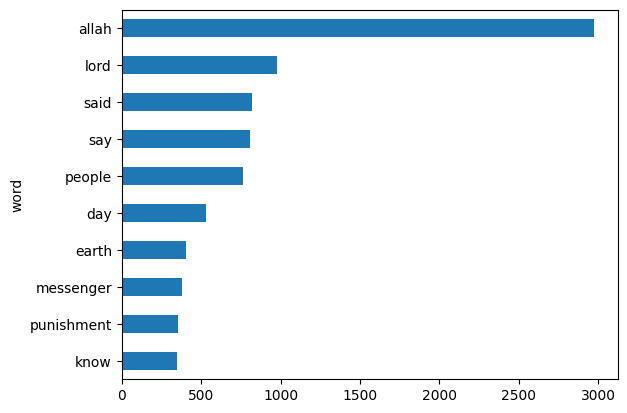

In [173]:
quran_top_words = data_quran.quran.sort_values(ascending=False).reset_index()
quran_top_words.columns = ['word','count']
quran_top_words.head(10).plot(kind='barh',x='word',y='count', legend=False)
plt.gca().invert_yaxis()

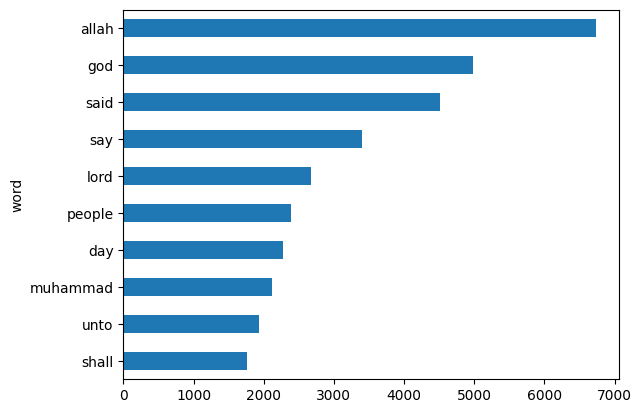

In [174]:
tafseer_top_words = data_tafseer.tafseer.sort_values(ascending=False).reset_index()
tafseer_top_words.columns = ['word','count']
tafseer_top_words.head(10).plot(kind='barh',x='word',y='count', legend=False)
plt.gca().invert_yaxis()

# WordCloud for the Holy Quran

In [180]:
quran_top_words['word']# already sorted in desending order

0                  allah
1                   lord
2                   said
3                    say
4                 people
              ...       
4412             mocking
4413             mockery
4414               mixed
4415    misunderstanding
4416             invalid
Name: word, Length: 4417, dtype: object

In [194]:
from wordcloud import WordCloud, STOPWORDS

popular_words = quran_top_words['word']

# making sure that the words is not stopwords such as = ('the', 'a', 'etc..')
finalized_words = [word for word in popular_words if word.lower() not in stopwords.words("english")]

finalized_words[:10], len(finalized_words)

(['allah',
  'lord',
  'said',
  'say',
  'people',
  'day',
  'earth',
  'messenger',
  'punishment',
  'know'],
 4417)

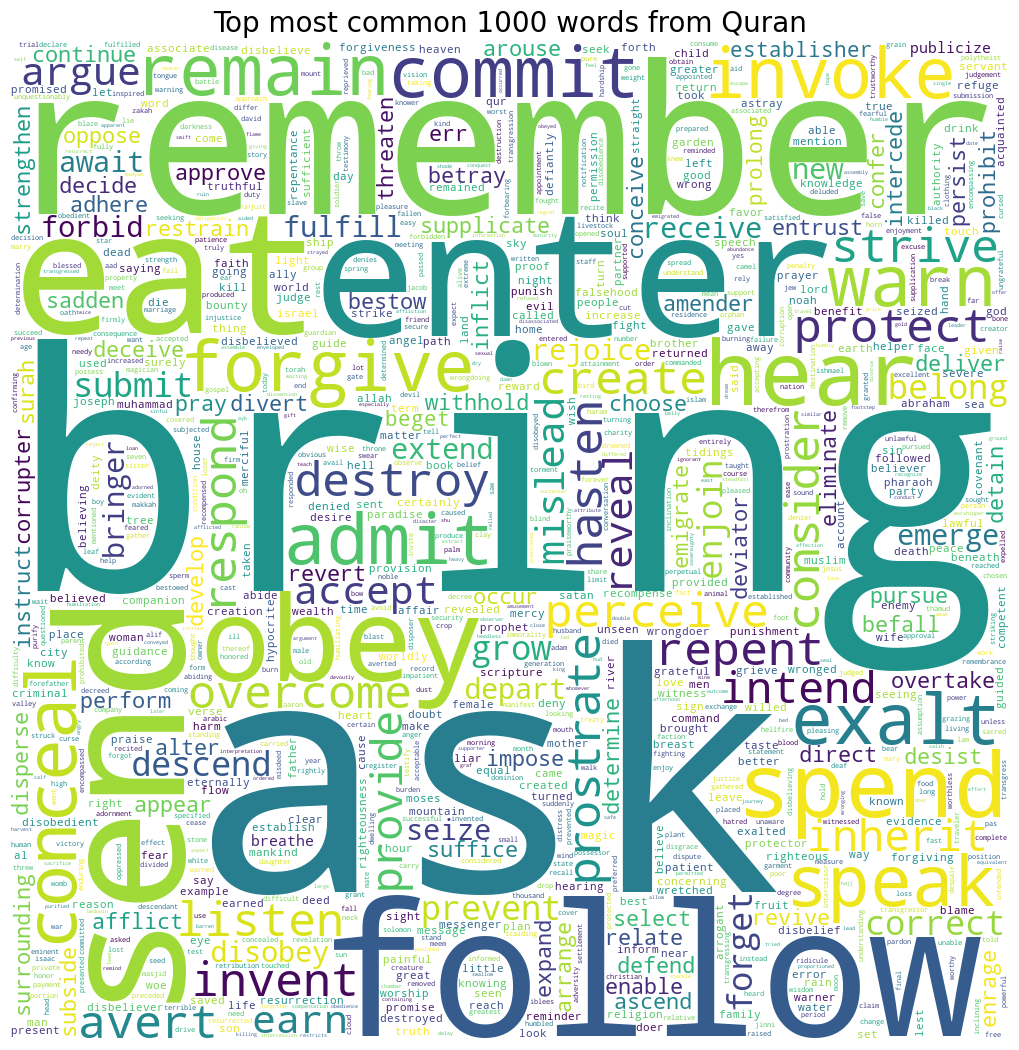

In [196]:
wordcloud = WordCloud(stopwords=STOPWORDS,
                          background_color='white',
                          max_words=1000, # change this to change the size
                          width=1000,
                          height=1000,
                         ).generate(" ".join(finalized_words))
plt.imshow(wordcloud)  # Display the word cloud image with smooth interpolation
plt.gcf().set_size_inches(10, 12)                      # gets the current figure object then { Set the figure size to 10 inches wide and 12 inches tall }
plt.axis('off')                                  # Hide the axes for a cleaner look
plt.title("Top most common 1000 words from Quran", fontsize=20)  # Set the title with specified font size
plt.tight_layout(pad=0)                          # Adjust layout to remove any padding around the figure

# Save the figure
# fig.savefig("quran_wordcloud.png", dpi=300, bbox_inches='tight')  # Change filename or format as needed


# WordCloud for the Tafseer

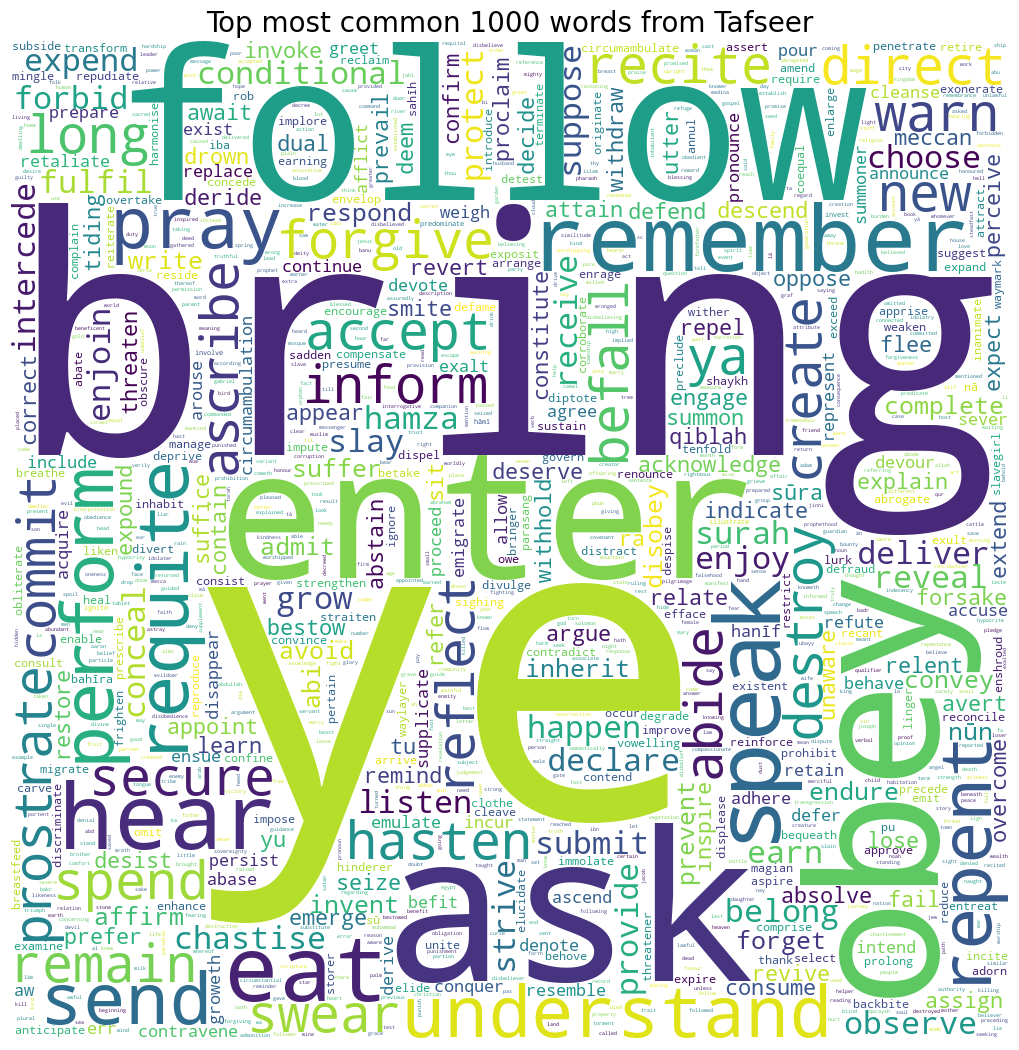

In [197]:
popular_words = tafseer_top_words['word']
final_words = [ word for word in popular_words if word.lower() not in stopwords.words("english") ]

wordcloud = WordCloud(stopwords=STOPWORDS,
                          background_color='white',
                          max_words=1000,
                          width=1000,height=1000,
                         ).generate(" ".join(final_words))
plt.imshow(wordcloud) # shows the wordcloud
plt.gcf().set_size_inches(10,12)
plt.axis('off') # turn off the axis for a cleaner look
plt.title("Top most common 1000 words from Tafseer",fontsize=20)
plt.tight_layout(pad=0)

fig.savefig("tafseer_wordcloud.png", dpi=300, bbox_inches='tight')  # Change filename or format as needed


# Topic Modeling 

In [198]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Assuming your corpus_quran is a Series with a single cleaned string
full_text = corpus_quran.iloc[0]
len(full_text)

435244

In [201]:
# Split text into chunks of 30 words
def split_into_chunks(text, chunk_size=30):
    words = text.split()
    return [' '.join(words[i:i+chunk_size]) for i in range(0, len(words), chunk_size)]

chunks = split_into_chunks(full_text, chunk_size=30) # change the chunk size here

In [202]:
len(chunks)

2101

`is it better to keep the verses as they are without splitting them into chunks and then  let the LDA discover the topics using the normal separation of the verses in the holy quran. ` -- `FUTURE WORK`

`Explained on MY IPAD` for the code below 👇🏼

In [204]:
vect_quran = CountVectorizer(stop_words='english')
data_vect_quran = vect_quran.fit_transform(chunks) 

In [227]:
n_topics = 10  # Adjust as needed
lda_model = LatentDirichletAllocation(n_components=n_topics, random_state=42)
lda_model.fit(data_vect_quran)

LatentDirichletAllocation(random_state=42)

In [228]:
len(lda_model.components_) # 10 topics

10

In [229]:
topic = lda_model.components_[0]

In [260]:
lda_model.components_[0].argsort()[:-10-1:-1] 

array([4363,  449, 2523,  949, 2023, 3111, 1619, 2490, 1836,  448])

In [251]:
top_indices = lda_model.components_[0].argsort()[:-10-1:-1] # top words indicies

In [252]:
features = vect_quran.get_feature_names_out()

In [253]:
for i in top_indices: 
    word = features[i]
    score = topic[i]
    print(f'{word} - {score}')

woman - 56.938414065853436
believing - 30.812617321576134
men - 26.782879598372542
day - 24.119169619834203
house - 19.515314881452532
punishment - 18.194426900880572
father - 16.46223098972899
marry - 15.528461836108502
good - 12.32402156177933
believer - 11.358222692239133


In [261]:
def display_topics_with_scores(model, feature_names, no_top_words=10):

    # model.components_ contains 10 lists, with values inside of them, so enumerate will give us index and the values in the array 
    for topic_idx, topic in enumerate(model.components_):
        print(f"\n🟦 Topic {topic_idx + 1}:")
        top_indices = topic.argsort()[:-no_top_words - 1:-1] # this works this way because it argsort() sorts the indicies from smallest to largest
        for i in top_indices:
            word = feature_names[i]
            score = topic[i]
            print(f"{word:<15} — {score:.4f}") # very cool way to print stuff !
            
display_topics_with_scores(lda_model, vect_quran.get_feature_names_out(), no_top_words=10)


🟦 Topic 1:
woman           — 56.9384
believing       — 30.8126
men             — 26.7829
day             — 24.1192
house           — 19.5153
punishment      — 18.1944
father          — 16.4622
marry           — 15.5285
good            — 12.3240
believer        — 11.3582

🟦 Topic 2:
allah           — 581.1398
say             — 446.4388
day             — 220.2349
lord            — 166.6263
earth           — 139.5769
come            — 118.9484
people          — 107.9268
muhammad        — 96.1147
truth           — 91.2151
heaven          — 87.5115

🟦 Topic 3:
allah           — 83.3073
lord            — 50.2006
know            — 47.7898
day             — 45.4931
earth           — 34.2242
disbeliever     — 31.1448
recompense      — 25.4194
punishment      — 25.3593
messenger       — 24.4007
heaven          — 22.4151

🟦 Topic 4:
allah           — 959.2764
earth           — 132.5228
know            — 122.5816
knowing         — 118.8041
say             — 115.8761
heaven          — 113.3425
pun

In [262]:
lda_model.components_.shape

(10, 4417)

`THEN USE THE ABOVE TOPICS WITH THE TOP WORDS TO FIND TITLES. YOU CAN USE CHATGPT TO GET AN IDEA OF HOW TO NAME THE TOPICS BASED ON IT'S TOP 10 KEYWORDS`

## Topic 1

Suggested Name: **Divine Ownership and Judgment**
Reason: Keywords like allah, earth, heaven, messenger, fear, merciful, belongs point to themes of God’s dominion and judgment.

## Topic 2

Suggested Name: **Prophethood and Belief vs. Disbelief**
Reason: Heavy emphasis on allah, messenger, muhammad, believe, disbeliever suggests this topic covers the prophetic message and the reaction to it.


## Topic 3

Suggested Name: **Creation and the Day of Judgment**
Reason: Strong presence of day, created, lord, earth, messenger points to themes around the Day of Judgment and creation.


## Topic 4

Suggested Name: **Divine Revelation and Human Response**
Reason: Keywords like said, messenger, people, given, say suggest divine speech (revelation) and how humans are supposed to respond.


## Topic 5

Suggested Name: **Natural Signs and Gratitude**
Reason: Keywords like mountain, wind, cloud, earth, garden, grateful point to natural phenomena and the importance of being thankful.

## Topic 6

Suggested Name: **Paradise and Punishment**
Reason: Clear contrast in keywords like garden, punishment, righteous, eternally, denied that talk about consequences in the hereafter.

## Topic 7

Suggested Name: **Call to Belief and Inner Reflection**
Reason: Say, believe, come, heart, good—this topic seems focused on the inner appeal of faith and encouragement to believe.

## Topic 8

Suggested Name: **Monotheism and Divine Authority**
Reason: Say, lord, allah, worship, punishment suggest the topic focuses on the oneness of God and accountability.

## Topic 9

Suggested Name: **Stories of Moses and Pharaoh**
Reason: Very specific keywords like moses, pharaoh, brother, father, came suggest the narrative of Moses.

## Topic 10
Suggested Name: **Daily Life and Human Behavior**
Reason: Keywords like woman, eat, drink, fruit, spring, men point to human life, possibly stories of Adam and Eve or general behavior.
